In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn import datasets

In [3]:
# Load iris dataset
iris = datasets.load_iris()
data = pd.DataFrame(data=iris.data, columns=iris.feature_names)
data['Species'] = iris.target_names[iris.target]

In [4]:
# Encode the target variable
le = LabelEncoder()
data['Species'] = le.fit_transform(data['Species'])


In [5]:
X = data.drop('Species', axis=1)
y = data['Species']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

In [8]:
# Evaluate Random Forest Model
print("Random Forest Model:")
print("Accuracy:", accuracy_score(y_test, rf_predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_predictions))
print("Classification Report:\n", classification_report(y_test, rf_predictions))

Random Forest Model:
Accuracy: 1.0
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



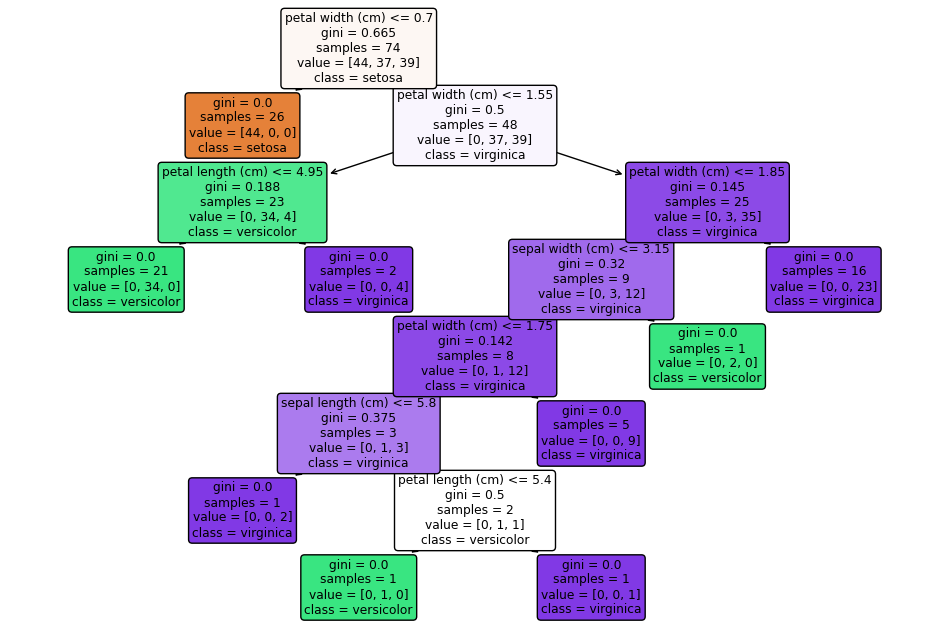

In [9]:
# Visualize a decision tree from the Random Forest
plt.figure(figsize=(12, 8))
plot_tree(rf_model.estimators_[0], feature_names=iris.feature_names, class_names=iris.target_names, filled=True, rounded=True)
plt.show()

In [10]:
nn_model = Sequential()
nn_model.add(Dense(16, input_dim=4, activation='relu'))
nn_model.add(Dense(3, activation='softmax'))
nn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [11]:
nn_model.fit(X_train, y_train, epochs=50, batch_size=10, validation_data=(X_test, y_test), verbose=0)

In [12]:
import numpy as np

# Evaluate Neural Network Model
nn_predictions_prob = nn_model.predict(X_test)
nn_predictions = np.argmax(nn_predictions_prob, axis=-1)

print("\nNeural Network Model:")
print("Accuracy:", accuracy_score(y_test, nn_predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, nn_predictions))
print("Classification Report:\n", classification_report(y_test, nn_predictions))

1/1 [==============================] - 0s 83ms/step

Neural Network Model:
Accuracy: 0.9666666666666667
Confusion Matrix:
 [[10  0  0]
 [ 0  8  1]
 [ 0  0 11]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.89      0.94         9
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



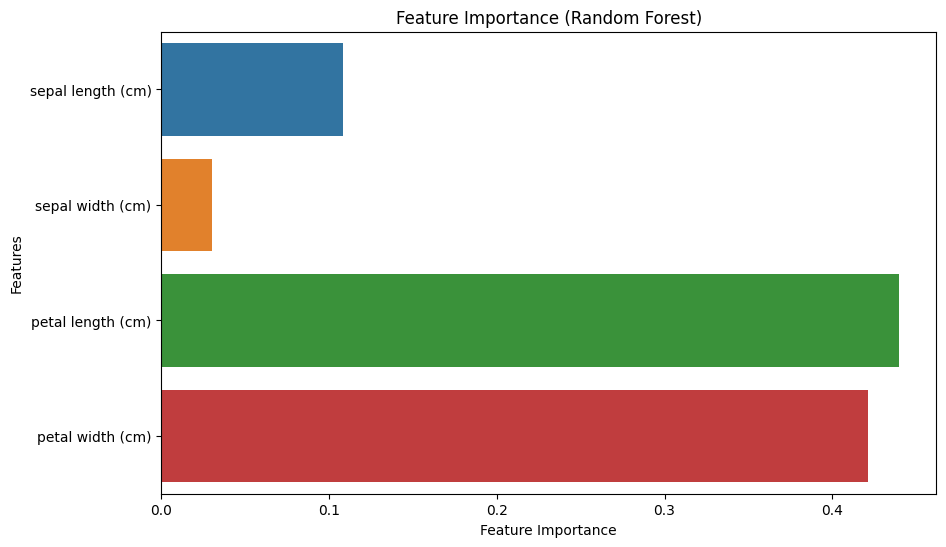

In [15]:
import seaborn as sns

# Visualize feature importance for Random Forest
feature_importance = rf_model.feature_importances_
feature_names = iris.feature_names

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance, y=feature_names)
plt.title('Feature Importance (Random Forest)')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.show()

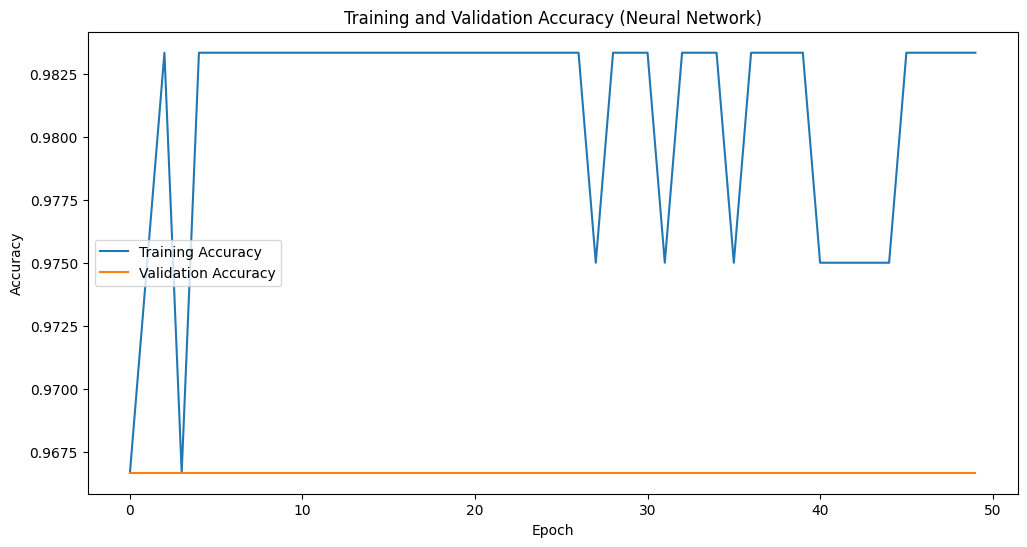

In [16]:
# Train the neural network
history = nn_model.fit(X_train, y_train, epochs=50, batch_size=10, validation_data=(X_test, y_test), verbose=0)

# Visualize training and validation accuracy for Neural Network
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy (Neural Network)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()



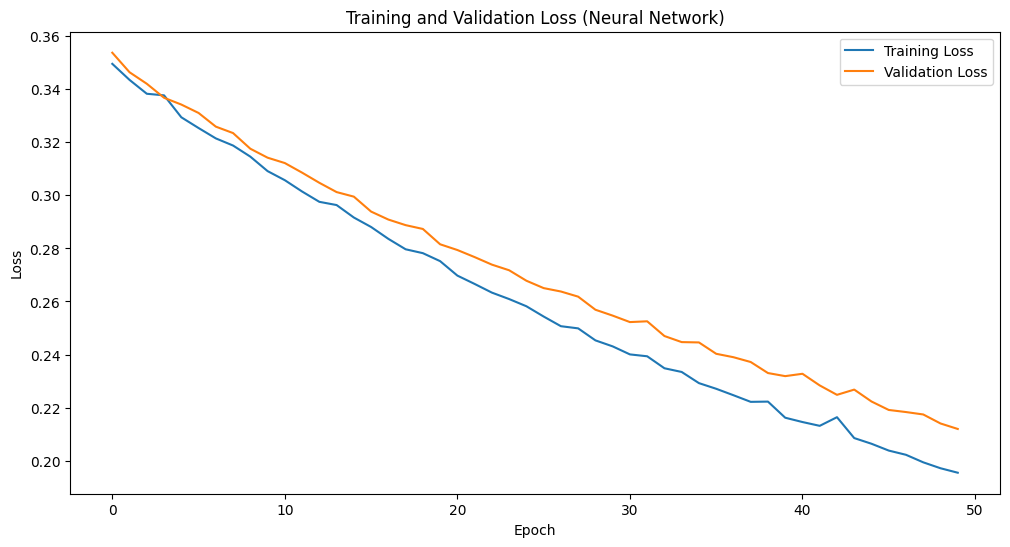

In [17]:
# Visualize training and validation loss for Neural Network
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss (Neural Network)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
